# Import modules

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Support function

In [286]:
# Reformat the date from y.d.m to m/y
def reformat_date(video_list, feature_date='trending_date'):
    """
    Reformat the date from y.d.m to d/m/Y for easy reading.

    Args:
        video_list (ndarray): The list of videos from one country.
        feature_date (str): The name of the feature column containing the date (default: 'trending_date').

    Returns:
        video_list (ndarray): The list of videos from one country after reformatting.
    """
    video_list[feature_date] = pd.to_datetime(video_list[feature_date], format='%y.%d.%m')
    video_list[feature_date] = video_list[feature_date].dt.strftime('%m/%Y')
    
    return video_list

# Identify the type of features
def type_of_feature(video_list):
    """
    Identify the type of features in the dataset.

    Args:
        video_list (ndarray): The list of videos from one country.

    Returns:
        list_of_type (object): The list of feature types.
    """
    return video_list.dtypes

# Count the unique records in feature
def count_unique_records(video_list, feature_name):
    """
    Count the unique records in a feature.

    Args:
        video_list (ndarray): The list of videos from one country.
        feature_name (str): The name of the feature column in which to count unique records.

    Returns:
        df (DataFrame): The data frame of each unique record and its count.
    """
    counts = video_list[feature_name].value_counts()

    df = pd.DataFrame({
        f'{feature_name}': counts.index.tolist(),
        f'count_{feature_name}': counts.values.tolist(),
    })
    
    df.sort_values(by=[f'count_{feature_name}'], ascending=True)
    
    return df



### Cleaning the data

In [287]:
# Take the Canada Videos as the example
caVideo = pd.read_csv('./youtube_data/CAvideos.csv')

reformat_date(caVideo)
caVideo.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,11/2017,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,11/2017,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,11/2017,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


### Exploring the data

In [288]:
type_of_feature(caVideo)

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

### Question 1: Who is the owner of the most trending videos on YouTube each year?

In [289]:
# Group by 'trending_date' and 'channel_title' and get the size (count) of each group
trending_owner_videos_each_month = caVideo.groupby(['trending_date', 'channel_title']).size().reset_index(name='count')

# For each 'trending_date', find the row with the maximum count
most_trending_owner_per_month = trending_owner_videos_each_month.loc[trending_owner_videos_each_month.groupby('trending_date')['count'].idxmax()]

# Print the result
print(most_trending_owner_per_month)

      trending_date          channel_title  count
1149        01/2018        The Young Turks     29
1664        02/2018                    CNN     28
3100        03/2018                    CNN     31
4574        04/2018                    CNN     24
5952        05/2018                    CNN     31
7264        06/2018     AlHayah TV Network     14
8399        11/2017  Good Mythical Morning     17
10295       12/2017              VikatanTV     31


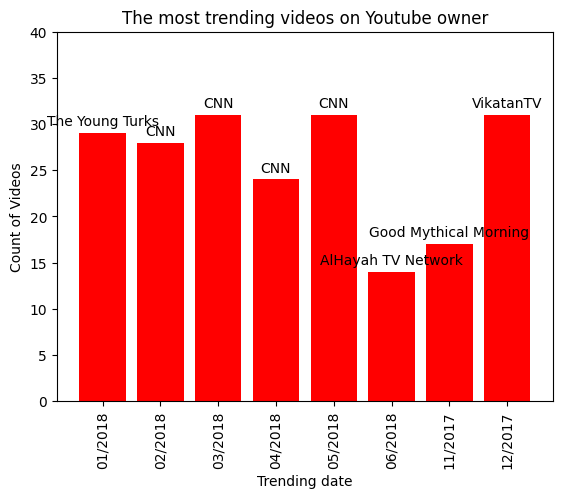

In [290]:
# Draw the bar chart
bars = plt.bar(most_trending_owner_per_month['trending_date'], most_trending_owner_per_month['count'], color='r')

# Set the y-axis limit
plt.ylim(0, 40)

# Add title and labels
plt.title('The most trending videos on Youtube owner')
plt.xlabel('Trending date')
plt.ylabel('Count of Videos')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

for i, bar in enumerate(bars):
    yval = bar.get_height()  # Get the height of the bar (the count)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, most_trending_owner_per_month['channel_title'].iloc[i], 
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()